In [1]:
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import tweepy, codecs

In [2]:
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_token_secret = 'access_token_secret'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
# user timeline

name = "SILintl"
tweet_count = 100

user_timetime = api.user_timeline(id=name, count=tweet_count)

for i in user_timetime:
    print(i.text)

Did you know that more than 40 languages are spoken and signed in Uganda? #LanguagesMatter https://t.co/NN8ToRlmKE
Can you spot where #Lunyole is spoken on the map? 🗺️ https://t.co/RcOvzD8Ngp
“A good head and good heart are always a formidable combination. But when you add to that a literate tongue or pen,… https://t.co/4qUqsr75jg
RT @UNESCO: International #LiteracyDay will be celebrated on 8 September!

Our goal? Advocate for literacy around the world, with a focus t…
RT @UN_Women: Educate a girl, change the world.
📕✏️👩‍🏫
This #LiteracyDay, join @Malala in advocating for the right to education! https://t.…
Curious about global literacy? Learn more through a short #InternationalLiteracyDay quiz! 📖

Test your knowledge:… https://t.co/PrEbXM09P2
Happy #InternationalLiteracyDay!📚

Developing literacy skills = more opportunities for education, economic interact… https://t.co/5a094uWELX
Key facts about #Lunyole 📗

Check out @theEthnologue for more! https://t.co/FKtXAFr3YD
This week we will 

In [5]:
def timeline_df(tweets):
    import pandas as pd
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['created_at'] = list(map(lambda tweet: tweet.created_at, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['favorite_count'] = list(map(lambda tweet: tweet.favorite_count, tweets))
    df['retweet_count'] = list(map(lambda tweet: tweet.retweet_count, tweets))
    df['source'] = list(map(lambda tweet: tweet.source, tweets))
    return df

In [6]:
tweets = api.user_timeline(id="SILintl", count=200)
df = timeline_df(tweets)

In [7]:
df

,id,created_at,text,favorite_count,retweet_count,source
0,1436054039402360832,2021-09-09 19:48:58,Did you know that more than 40 languages are s...,5,1,Twitter Web App
1,1435679820332085264,2021-09-08 19:01:57,Can you spot where #Lunyole is spoken on the m...,5,0,Hootsuite Inc.
2,1435664470408409095,2021-09-08 18:00:57,“A good head and good heart are always a formi...,1,1,Hootsuite Inc.
3,1435640810335318022,2021-09-08 16:26:56,RT @UNESCO: International #LiteracyDay will be...,0,332,Twitter Web App
4,1435640648028364801,2021-09-08 16:26:18,"RT @UN_Women: Educate a girl, change the world...",0,1027,Twitter Web App
...,...,...,...,...,...,...
195,1410283199121412098,2021-06-30 17:04:51,"Yes, @idiomarium thank you for catching the mi...",0,0,TweetDeck
196,1410272667769315329,2021-06-30 16:23:00,This #WordWednesday will make you laugh. But h...,2,0,TweetDeck
197,1410257316721664005,2021-06-30 15:22:00,The #LanguageoftheDay in @theEthnologue is #To...,1,0,TweetDeck
198,1410242950806736897,2021-06-30 14:24:55,So excited about this partnership. Thank you @...,6,0,TweetDeck


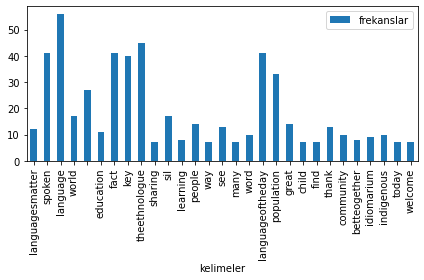

In [9]:
# buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]', '')
# sayılar
df['text'] = df['text'].str.replace('\d', '')

# stopwords
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if (x not in sw and not x.startswith("http"))))

# lemmi
from textblob import Word

# nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# noktalama işaretleri
df['text'] = df['text'].str.replace('rt', '')

df["text"]

freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

freq_df.columns = ["kelimeler", "frekanslar"]

freq_df.shape

freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]

a = freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]

a.plot.bar(x="kelimeler", y="frekanslar")
plt.tight_layout()
plt.show()


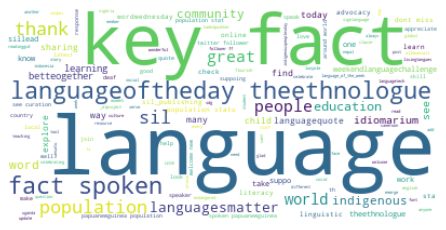

In [10]:
## Word cloud

# !pip install wordcloud

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(i for i in df.text)

text

wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# wc = WordCloud(background_color="white",
#                max_words=1000,
#                contour_width=3,
#                contour_color="firebrick")

# wc.generate(text)
# plt.figure(figsize=(10, 10))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()


In [11]:
# Twitter Sentiment Analizi

df

from textblob import TextBlob


def sentiment_skorla(df):
    text = df["text"]

    for i in range(0, len(text)):
        textB = TextBlob(text[i])
        sentiment_skoru = textB.sentiment.polarity
        df.at[i, 'sentiment_skoru'] =  sentiment_skoru

        if sentiment_skoru < 0.00:
            duygu_sinifi = 'Negatif'
            df.at[i, 'duygu_sinifi'] = duygu_sinifi

        elif sentiment_skoru > 0.00:
            duygu_sinifi = 'Pozitif'
            df.at[i, 'duygu_sinifi'] =  duygu_sinifi

        else:
            duygu_sinifi = 'Notr'
            df.at[i, 'duygu_sinifi'] =  duygu_sinifi

    return df


df.head()


,id,created_at,text,favorite_count,retweet_count,source
0,1436054039402360832,2021-09-09 19:48:58,know language spoken signed uganda languagesma...,5,1,Twitter Web App
1,1435679820332085264,2021-09-08 19:01:57,spot lunyole spoken map,5,0,Hootsuite Inc.
2,1435664470408409095,2021-09-08 18:00:57,good head good hea always formidable combinati...,1,1,Hootsuite Inc.
3,1435640810335318022,2021-09-08 16:26:56,unesco international literacyday celebrated s...,0,332,Twitter Web App
4,1435640648028364801,2021-09-08 16:26:18,un_women educate girl change world literacyda...,0,1027,Twitter Web App


In [12]:
df_sentiment = sentiment_skorla(df)

In [13]:
df_sentiment

,id,created_at,text,favorite_count,retweet_count,source,sentiment_skoru,duygu_sinifi
0,1436054039402360832,2021-09-09 19:48:58,know language spoken signed uganda languagesma...,5,1,Twitter Web App,0.00,Notr
1,1435679820332085264,2021-09-08 19:01:57,spot lunyole spoken map,5,0,Hootsuite Inc.,0.00,Notr
2,1435664470408409095,2021-09-08 18:00:57,good head good hea always formidable combinati...,1,1,Hootsuite Inc.,0.70,Pozitif
3,1435640810335318022,2021-09-08 16:26:56,unesco international literacyday celebrated s...,0,332,Twitter Web App,0.17,Pozitif
4,1435640648028364801,2021-09-08 16:26:18,un_women educate girl change world literacyda...,0,1027,Twitter Web App,0.29,Pozitif
...,...,...,...,...,...,...,...,...
195,1410283199121412098,2021-06-30 17:04:51,yes idiomarium thank catching mistake language...,0,0,TweetDeck,0.60,Pozitif
196,1410272667769315329,2021-06-30 16:23:00,wordwednesday make laugh honestly cant relate ...,2,0,TweetDeck,0.45,Pozitif
197,1410257316721664005,2021-06-30 15:22:00,languageoftheday theethnologue totonaco del ce...,1,0,TweetDeck,0.00,Notr
198,1410242950806736897,2021-06-30 14:24:55,excited panership thank houghtoncollege specif...,6,0,TweetDeck,0.38,Pozitif


In [14]:
positive = df_sentiment[df_sentiment["duygu_sinifi"] == "Pozitif"]
negative = df_sentiment[df_sentiment["duygu_sinifi"] == "Negatif"]

In [15]:
negative.duplicated().sum()

0

## Positive wordcloud

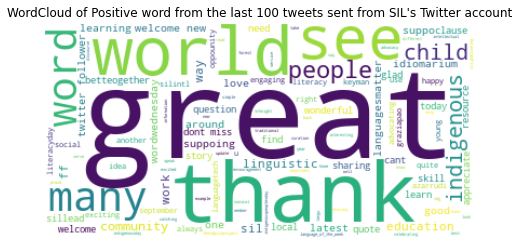

In [24]:
## Word cloud

# !pip install wordcloud

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(i for i in positive.text )
new_list = ['language']
text =  " ".join([i for i in text.split() if i not in new_list])
text

wordcloud = WordCloud(background_color="white",max_words=1000,
               contour_width=3,
               contour_color="firebrick").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Positive word from the last 100 tweets sent from SIL's Twitter account")
plt.tight_layout(pad=0)
plt.show()

# vbo_mask = np.array(Image.open("JqrH2Rgi_normal.jpg"))

# wc = WordCloud(background_color="white",
#                max_words=1000,
#                contour_width=3,
#                contour_color="firebrick")

# wc.generate(text)
# plt.figure(figsize=(10, 10))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")

# plt.tight_layout(pad=0)
# plt.show()


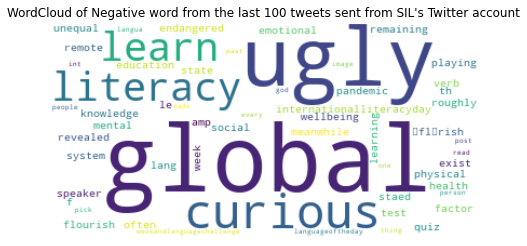

In [26]:
## Word cloud

# !pip install wordcloud

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(i for i in negative.text )
new_list = ['language', "sho"]
text =  " ".join([i for i in text.split() if i not in new_list])
text

wordcloud = WordCloud(background_color="white",max_words=1000,
               contour_width=3,
               contour_color="firebrick").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Negative word from the last 100 tweets sent from SIL's Twitter account")
plt.tight_layout(pad=0)
plt.show()

# vbo_mask = np.array(Image.open("JqrH2Rgi_normal.jpg"))

# wc = WordCloud(background_color="white",
#                max_words=1000,
#                contour_width=3,
#                contour_color="firebrick")

# wc.generate(text)
# plt.figure(figsize=(10, 10))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")

# plt.tight_layout(pad=0)
# plt.show()
